In [78]:
#SPOTIFY PROJECT
    #DISPLAYING THE MOST STREAMED MUSIC FOR 2023 and the less streamed of all times
    


In [4]:
import pandas as pd
import numpy as np
from pandasql import sqldf
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
import pandas as pd

# Try reading the CSV file with different encodings
encodings = ['utf-8', 'latin-1', 'cp1252']
success = False

for encoding in encodings:
    try:
        df = pd.read_csv("spotify-2023.csv", encoding=encoding)
        success = True
        break  # If successful, exit the loop
    except UnicodeDecodeError:
        pass

if success:
    # Data loaded successfully
    print("CSV file loaded successfully.")
    print(df)
else:
    # None of the encodings worked
    print("Unable to read the CSV file with the specified encodings.")


CSV file loaded successfully.
                              track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_mont

In [9]:
df

track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_playlists  \
0             2023               7            14                   553   
1             2023               3            23                  1474   
2             2023               6            30                  1397   
3             2019               8            23                  7858   
4             2023               5            18                  3133   
..             ...             ...           ...                   ...   
948           2022              11             3                   953   
949           2022              10            21                  1180   
950           2022              11             3                   573   
951           2022              10            20                  1320   
952           2022              11             4                   782   

     in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                  147  141381703                  43  ...  125   B  Major   
1                   48  133716286                  48  ...   92  C#  Major   
2                  113  140003974                  94  ...  138   F  Major   
3                  100  800840817                 116  ...  170   A  Major   
4                   50  303236322                  84  ...  144   A  Minor   
..                 ...        ...                 ...  ...  ...  ..    ...   
948                  0   91473363                  61  ...  144   A  Major   
949                  0  121871870                   4  ...  166  F#  Major   
950                  0   73513683                   2  ...   92  C#  Major   
951                  0  133895612                  29  ...   97  C#  Major   
952                  2   96007391                  27  ...   90   E  Minor   

    danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0               80         89       83             31                   0   
1               71         61       74              7                   0   
2               51         32       53             17                   0   
3               55         58       72             11                   0   
4               65         23       80             14                  63   
..             ...        ...      ...            ...                 ...   
948             60         24       39             57                   0   
949             42          7       24             83                   1   
950             80         81       67              4                   0   
951             82         67       77              8                   0   
952             61         32       67             15                   0   

     liveness_%  speechiness_%  
0             8              4  
1            10              4  
2            31              6  
3            11             15  
4            11              6  
..          ...            ...  
948           8              3  
949          12              6  
950           8              6  
951         

In [10]:
from pandasql import sqldf


In [60]:
#taking out the data that i want to use for analysis
pysqldf = sqldf('SELECT track_name,released_year as year_or_release, released_month, released_day, streams FROM df where year_or_release=2023 ', locals())

pysqldf

# Execute the SQL query
#result = pysqldf.execute('SELECT * FROM df')

track_name  year_or_release  released_month  \
0    Seven (feat. Latto) (Explicit Ver.)             2023               7   
1                                   LALA             2023               3   
2                                vampire             2023               6   
3                         WHERE SHE GOES             2023               5   
4                               Sprinter             2023               6   
..                                   ...              ...             ...   
170         I'm Not Here To Make Friends             2023               1   
171                            TRUSTFALL             2023               1   
172            VIBE (feat. Jimin of BTS)             2023               1   
173                             Muï¿½ï¿½             2023               1   
174                      Sugar Rush Ride             2023               1   

     released_day    streams  
0              14  141381703  
1              23  133716286  
2              30  140003974  
3              18  303236322  
4               1  183706234  
..            ...        ...  
170            27  103787664  
171            27  134255790  
172            13  152850295  
173            12  120972253  
174            27  107642809  

[175 rows x 5 columns]

In [62]:
# Assuming you have a DataFrame named 'pysqldf' and you want to sort it by a column, for example, 'year_or_release'
sorted_df = pysqldf.sort_values(by='year_or_release')


In [75]:
#taking the first 5 most stream
graph=sorted_df.head()
graph

track_name  year_or_release  \
0                  Seven (feat. Latto) (Explicit Ver.)             2023   
111       AMERICA HAS A PROBLEM (feat. Kendrick Lamar)             2023   
112  Link Up (Metro Boomin & Don Toliver, Wizkid fe...             2023   
113                             Erro Gostoso - Ao Vivo             2023   
114                                             Cupido             2023   

     released_month  released_day    streams  
0                 7            14  141381703  
111               5            19   57089066  
112               6             2   32761689  
113               1            27  153454328  
114               2            14  217672943

In [73]:
#plt.figure(figsize=(10, 6))
#plt.bar(graph["track_name"],graph["streams"])
#plt.show()


In [79]:
df

track_name      artist(s)_name  artist_count  \
0    Seven (feat. Latto) (Explicit Ver.)    Latto, Jung Kook             2   
1                                   LALA         Myke Towers             1   
2                                vampire      Olivia Rodrigo             1   
3                           Cruel Summer        Taylor Swift             1   
4                         WHERE SHE GOES           Bad Bunny             1   
..                                   ...                 ...           ...   
948                         My Mind & Me        Selena Gomez             1   
949            Bigger Than The Whole Sky        Taylor Swift             1   
950                 A Veces (feat. Feid)  Feid, Paulo Londra             2   
951                        En La De Ella  Feid, Sech, Jhayco             3   
952                                Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_playlists  \
0             2023               7            14                   553   
1             2023               3            23                  1474   
2             2023               6            30                  1397   
3             2019               8            23                  7858   
4             2023               5            18                  3133   
..             ...             ...           ...                   ...   
948           2022              11             3                   953   
949           2022              10            21                  1180   
950           2022              11             3                   573   
951           2022              10            20                  1320   
952           2022              11             4                   782   

     in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                  147  141381703                  43  ...  125   B  Major   
1                   48  133716286                  48  ...   92  C#  Major   
2                  113  140003974                  94  ...  138   F  Major   
3                  100  800840817                 116  ...  170   A  Major   
4                   50  303236322                  84  ...  144   A  Minor   
..                 ...        ...                 ...  ...  ...  ..    ...   
948                  0   91473363                  61  ...  144   A  Major   
949                  0  121871870                   4  ...  166  F#  Major   
950                  0   73513683                   2  ...   92  C#  Major   
951                  0  133895612                  29  ...   97  C#  Major   
952                  2   96007391                  27  ...   90   E  Minor   

    danceability_%  valence_% energy_% acousticness_%  instrumentalness_%  \
0               80         89       83             31                   0   
1               71         61       74              7                   0   
2               51         32       53             17                   0   
3               55         58       72             11                   0   
4               65         23       80             14                  63   
..             ...        ...      ...            ...                 ...   
948             60         24       39             57                   0   
949             42          7       24             83                   1   
950             80         81       67              4                   0   
951             82         67       77              8                   0   
952             61         32       67             15                   0   

     liveness_%  speechiness_%  
0             8              4  
1            10              4  
2            31              6  
3            11             15  
4            11              6  
..          ...            ...  
948           8              3  
949          12              6  
950           8              6  
951         

In [80]:
#sort Music based on most 
sort_all=df.sort_values(by='streams')

In [81]:
sort_all

track_name      artist(s)_name  \
301  Arcï¿½ï¿½ngel: Bzrp Music Sessions, Vol  Arcangel, Bizarrap   
500                               ýýýabcdefu               Gayle   
515                             Best Friends          The Weeknd   
744                                 Right On            Lil Baby   
366                                  Revenge        XXXTENTACION   
..                                       ...                 ...   
455                           Seek & Destroy                 SZA   
253                            Glimpse of Us                Joji   
625                                   Arcade     Duncan Laurence   
33                                 Anti-Hero        Taylor Swift   
574      Love Grows (Where My Rosemary Goes)   Edison Lighthouse   

     artist_count  released_year  released_month  released_day  \
301             2           2023               3            22   
500             1           2021               8            13   
515             1           2022               1             7   
744             1           2022               4             8   
366             1           2017               8            25   
..            ...            ...             ...           ...   
455             1           2022              12             9   
253             1           2022               6            10   
625             1           2019               3             7   
33              1           2022              10            21   
574             1           1970               1             1   

     in_spotify_playlists  in_spotify_charts  \
301                   654                  3   
500                  7215                  0   
515                  1292                  0   
744                  1116                  0   
366                  3600                 11   
..                    ...                ...   
455                  1007                  0   
253                  6330                  6   
625                  6646                  0   
33                   9082                 56   
574                  2877                  0   

                                               streams  in_apple_playlists  \
301                                          100409613                  11   
500                                         1007612429                 170   
515                                          101114984                   3   
744                                          101780047                  31   
366                                         1022258230                   7   
..                                                 ...                 ...   
455                                           98709329                   5   
253                                          988515741                 109   
625                                          991336132                 107   
33                                           999748277                 242   
574  BPM110KeyAModeMajorDanceability53Valence75Ener...                  16   

     ...  bpm key   mode danceability_%  valence_% energy_% acousticness_%  \
301  ...  124   B  Minor             72         79       78             55   
500  ...  122   E  Major             70         42       54             30   
515  ...   87   E  Minor             49         49       59             44   
744  ...  166   D  Major             70         22       61              2   
366  ...  140   B  Minor             75         18       25             78   
..   ...  ...  ..    ...            ...        ...      ...            ...   
455  ...  152  C#  Major             65         35       65             44   
253  ...  170  G#  Major             44         27       32             89   
625  ...   72   A  Minor             45         27       33             82   
33   ...   97   E  Major             64         51       63             12   
574  ...  110   A  Major             53         75  

In [172]:
f5=sort_all.head()

In [174]:
l5=sort_all.tail()

In [178]:
L5=l5.head(4)
L5

track_name   artist(s)_name  artist_count  released_year  \
455  Seek & Destroy              SZA             1           2022   
253   Glimpse of Us             Joji             1           2022   
625          Arcade  Duncan Laurence             1           2019   
33        Anti-Hero     Taylor Swift             1           2022   

     released_month  released_day  in_spotify_playlists  in_spotify_charts  \
455              12             9                  1007                  0   
253               6            10                  6330                  6   
625               3             7                  6646                  0   
33               10            21                  9082                 56   

       streams  in_apple_playlists  ...  bpm key   mode danceability_%  \
455   98709329                   5  ...  152  C#  Major             65   
253  988515741                 109  ...  170  G#  Major             44   
625  991336132                 107  ...   72   A  Minor             45   
33   999748277                 242  ...   97   E  Major             64   

     valence_% energy_% acousticness_%  instrumentalness_%  liveness_%  \
455         35       65             44                  18          21   
253         27       32             89                   0          14   
625         27       33             82                   0          14   
33          51       63             12                   0          19   

     speechiness_%  
455              7  
253              5  
625              4  
33               5  

[4 rows x 24 columns]

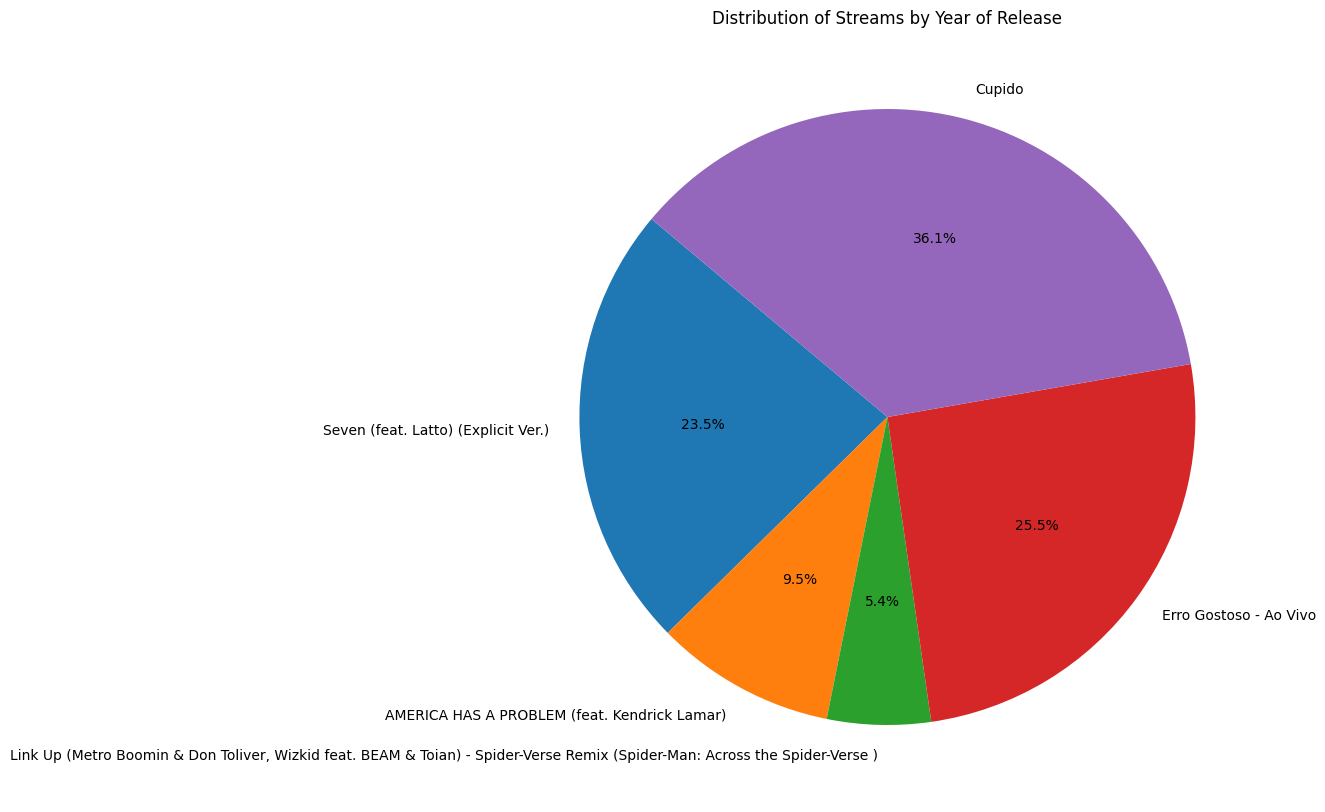

In [74]:
import matplotlib.pyplot as plt

# Data
labels = graph["track_name"]
sizes = graph["streams"]

# Create a pie chart
plt.figure(figsize=(10, 10))  # Set the figure size
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Distribution of Streams by Year of Release')

# Display the chart
plt.show()


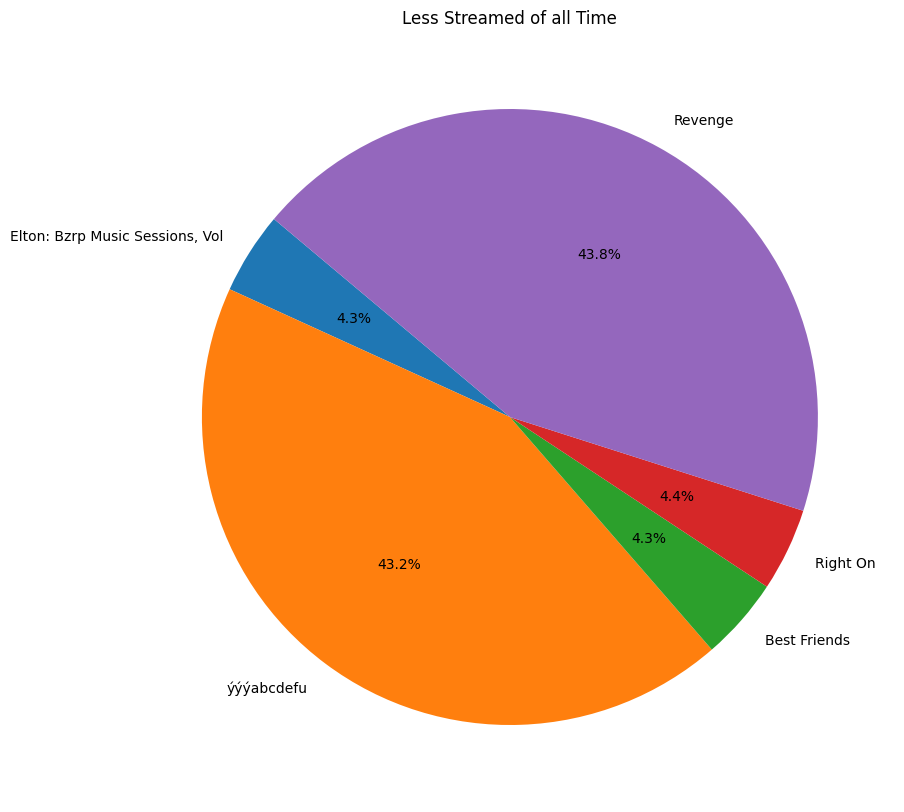

In [179]:
labels = f5["track_name"]
sizes = f5["streams"]

# Create a pie chart
plt.figure(figsize=(10, 10))  # Set the figure size
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Less Streamed of all Time')

# Display the chart
plt.show()


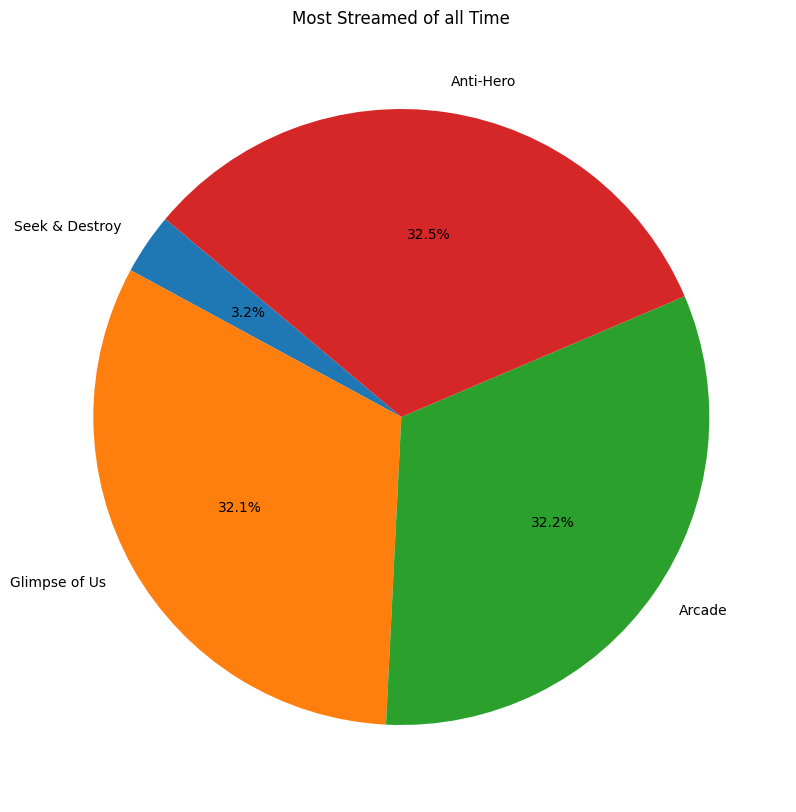

In [180]:
labels = L5["track_name"]
sizes = L5["streams"]

# Create a pie chart
plt.figure(figsize=(10, 10))  # Set the figure size
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title('Most Streamed of all Time')

# Display the chart
plt.show()